# **ANALISIS EXPLORATORIO DE DATOS**

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
# Ruta al archivo local
file_path = "../data/train.csv"

In [37]:
# Cargar el dataset
df = pd.read_csv(file_path)

In [38]:
# Ajustar las opciones de visualización de pandas
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)        # Ajustar el ancho de la salida para evitar cortes
pd.set_option('display.max_colwidth', None) # Mostrar el contenido completo de cada columna

In [39]:
def eliminar_espacios_es_blanco(df):
    """
    Función para realizar la limpieza inicial del dataset.
    - Elimina espacios en blanco al inicio y final de los valores en cada celda.
    - Resetea el índice del DataFrame después de eliminar duplicados.
    """
    # Eliminar espacios en blanco al inicio y final de los valores en cada celda (solo para columnas tipo string)
    df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
    
    # Resetear el índice del DataFrame
    df = df.reset_index(drop=True)
    
    return df

In [40]:
# Llamado de la función para limpiar el dataset
df = eliminar_espacios_es_blanco(df)

C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_9632\4005586089.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [41]:
# Mostrar las primeras filas
df.head(1)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.82262,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good


---

### **1. Traducir los Nombres de las Columnas al Español**

In [42]:
# Diccionario de traducción de nombres de columnas
columnas_espanol = {
    'ID': 'ID',
    'Customer_ID': 'ID_Cliente',
    'Month': 'Mes',
    'Name': 'Nombre',
    'Age': 'Edad',
    'SSN': 'Numero_Seguro_Social',
    'Occupation': 'Ocupacion',
    'Annual_Income': 'Ingreso_Anual',
    'Monthly_Inhand_Salary': 'Salario_Mensual',
    'Num_Bank_Accounts': 'Num_Cuentas_Bancarias',
    'Num_Credit_Card': 'Num_Tarjetas_Credito',
    'Interest_Rate': 'Tasa_Interes',
    'Num_of_Loan': 'Num_Prestamos',
    'Type_of_Loan': 'Tipo_Prestamo',
    'Delay_from_due_date': 'Retraso_Pago',
    'Num_of_Delayed_Payment': 'Num_Pagos_Retrasados',
    'Changed_Credit_Limit': 'Cambio_Limite_Credito',
    'Num_Credit_Inquiries': 'Num_Consultas_Credito',
    'Credit_Mix': 'Mezcla_Crediticia',
    'Outstanding_Debt': 'Deuda_Pendiente',
    'Credit_Utilization_Ratio': 'Ratio_Utilizacion_Credito',
    'Credit_History_Age': 'Edad_Historial_Credito',
    'Payment_of_Min_Amount': 'Pago_Minimo',
    'Total_EMI_per_month': 'Total_Cuota_Mensual',
    'Amount_invested_monthly': 'Inversion_Mensual',
    'Payment_Behaviour': 'Comportamiento_Pago',
    'Monthly_Balance': 'Saldo_Mensual',
    'Credit_Score': 'Puntaje_Credito'
}

# Renombrar las columnas del DataFrame
df.rename(columns=columnas_espanol, inplace=True)

### **2. Diccionario de Datos**


| Columna                     | Descripción                                                                 |
|-----------------------------|-----------------------------------------------------------------------------|
| ID                          | Identificación única del registro.                                         |
| ID_Cliente                  | Identificación única del cliente.                                          |
| Mes                         | Mes del año.                                                                |
| Nombre                      | Nombre de la persona.                                                       |
| Edad                        | Edad de la persona.                                                         |
| Numero_Seguro_Social        | Número de Seguro Social de la persona.                                     |
| Ocupacion                   | Ocupación de la persona.                                                    |
| Ingreso_Anual               | Ingreso anual de la persona.                                               |
| Salario_Mensual             | Salario mensual neto de la persona.                                        |
| Num_Cuentas_Bancarias       | Número de cuentas bancarias que posee la persona.                          |
| Num_Tarjetas_Credito        | Número de tarjetas de crédito que posee la persona.                        |
| Tasa_Interes                | Tasa de interés aplicada a las tarjetas de crédito de la persona.          |
| Num_Prestamos               | Número de préstamos que la persona ha tomado al banco.                 |
| Tipo_Prestamo               | Tipos de préstamos que la persona ha tomado al banco.                           |
| Retraso_Pago                | Promedio de días de retraso en los pagos desde la fecha de vencimiento.    |
| Num_Pagos_Retrasados        | Número de pagos retrasados por la persona.                                 |
| Cambio_Limite_Credito       | Cambio porcentual en el límite de la tarjeta de crédito de la persona.                   |
| Num_Consultas_Credito       | Número de consultas de tarjetas de crédito realizadas por la persona.                  |
| Mezcla_Crediticia           | Clasificación del Mix crediticio del cliente.                         |
| Deuda_Pendiente             | Saldo pendiente de la persona.                                             |
| Ratio_Utilizacion_Credito   | El índice de utilización del crédito de la tarjeta de crédito del cliente.                           |
| Edad_Historial_Credito      | Antigüedad del historial crediticio de la persona.                         |
| Pago_Minimo                 | "Yes" si la persona pagó únicamente el monto mínimo a pagar, de lo contrario "No". |
| Total_Cuota_Mensual         | Cuota total mensual (EMI) de la persona.                                   |
| Inversion_Mensual           | Monto mensual invertido por la persona.                                    |
| Comportamiento_Pago         | Comportamiento de pago de la persona.                                      |
| Saldo_Mensual               | Saldo mensual restante en la cuenta de la persona.                         |
| Puntaje_Credito             | Puntuación crediticia de la persona.                                       |

In [43]:
df.head()

,ID,ID_Cliente,Mes,Nombre,Edad,Numero_Seguro_Social,Ocupacion,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Tipo_Prestamo,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Pago_Minimo,Total_Cuota_Mensual,Inversion_Mensual,Comportamiento_Pago,Saldo_Mensual,Puntaje_Credito
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         100000 non-null  int64  
 1   ID_Cliente                 100000 non-null  int64  
 2   Mes                        100000 non-null  int64  
 3   Nombre                     100000 non-null  object 
 4   Edad                       100000 non-null  float64
 5   Numero_Seguro_Social       100000 non-null  float64
 6   Ocupacion                  100000 non-null  object 
 7   Ingreso_Anual              100000 non-null  float64
 8   Salario_Mensual            100000 non-null  float64
 9   Num_Cuentas_Bancarias      100000 non-null  float64
 10  Num_Tarjetas_Credito       100000 non-null  float64
 11  Tasa_Interes               100000 non-null  float64
 12  Num_Prestamos              100000 non-null  float64
 13  Tipo_Prestamo              100

### **3. Análisis de las Columnas**

El dataset contiene **28 columnas**, divididas en variables numéricas y categóricas:

- **Variables numéricas**: Representan métricas financieras clave, como ingresos, salarios, número de cuentas bancarias, tasas de interés y retrasos en pagos. Estas variables son útiles para identificar patrones cuantitativos.
- **Variables categóricas**: Incluyen ocupación, tipo de préstamo, comportamiento de pago y puntaje crediticio. Estas variables proporcionan contexto sobre el perfil del cliente y su historial crediticio.
- La **variable objetivo** es `Puntaje_Credito`, que clasifica a los clientes en tres categorías: Good (Buena), Standard (Estándar) y Poor (Pobre).

Este análisis inicial sugiere que el dataset está bien estructurado y contiene información relevante para predecir el puntaje crediticio.

#### **3.1 Análisis de las Columnas Categoricas**

- **Ocupacion de los Clientes"**

In [45]:
def contar_ocupaciones(df):
    """
    Función para contar la cantidad de clientes únicos por ocupación.
    
    Parámetros:
    df (pd.DataFrame): DataFrame con los datos de los clientes.
    
    Retorna:
    pd.DataFrame: Tabla con las ocupaciones y la cantidad de clientes únicos en cada una.
    """
    ocupaciones_clientes = df[['ID_Cliente', 'Ocupacion']].drop_duplicates()
    return ocupaciones_clientes['Ocupacion'].value_counts().reset_index().rename(columns={'index': 'Ocupacion', 'Ocupacion': 'Cantidad'})


In [46]:
# Ejemplo de uso
tabla_ocupaciones = contar_ocupaciones(df)
print(tabla_ocupaciones)

         Cantidad  count
0          Lawyer    887
1        Engineer    858
2       Architect    853
3        Mechanic    847
4       Scientist    843
5      Accountant    843
6       Developer    840
7   Media_Manager    840
8         Teacher    834
9    Entrepreneur    831
10         Doctor    821
11     Journalist    817
12        Manager    804
13       Musician    794
14         Writer    788


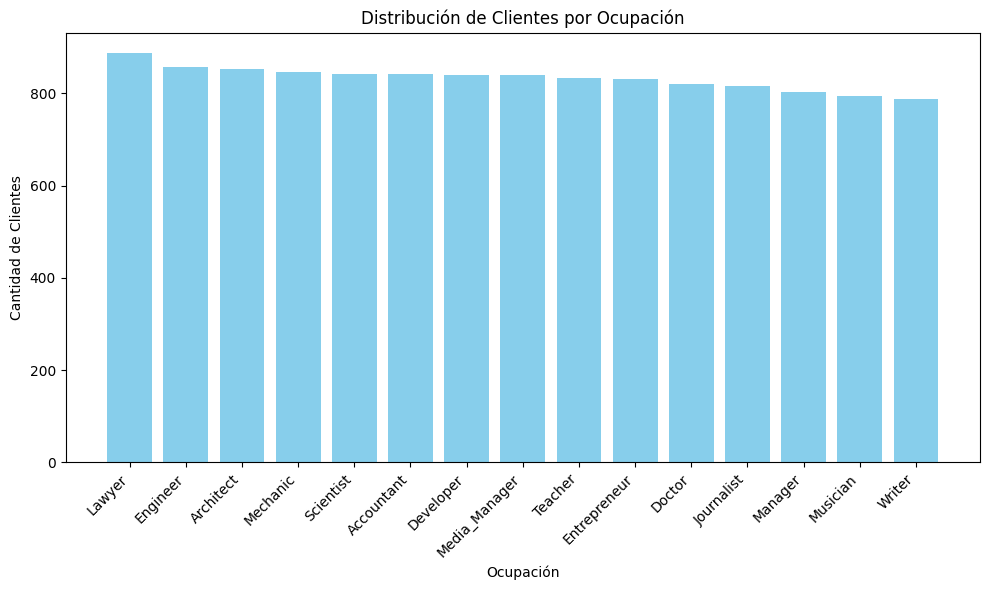

In [47]:
import matplotlib.pyplot as plt

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(tabla_ocupaciones['Cantidad'], tabla_ocupaciones['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas para mejor legibilidad
plt.xlabel('Ocupación')
plt.ylabel('Cantidad de Clientes')
plt.title('Distribución de Clientes por Ocupación')
plt.tight_layout()  # Ajustar diseño para evitar recortes
plt.show()

- **Columna "Tipo_Prestamo"**           

In [48]:
df[['Num_Prestamos', 'Tipo_Prestamo']].head(10)

,Num_Prestamos,Tipo_Prestamo
0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
1,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
2,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
3,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
4,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
5,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
6,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
7,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan"
8,1.0,Credit-Builder Loan
9,1.0,Credit-Builder Loan


Al analizar los datos, observé que cuando **`Num_Prestamos`** es `0`, **`Tipo_Prestamo`** registra "no data", lo cual es lógico: sin préstamos, no hay tipo que registrar. En cambio, cuando **`Num_Prestamos`** es mayor a `0`, **`Tipo_Prestamo`** indica productos crediticios específicos (p. ej., auto, computadora).

Sin embargo, **`Num_Prestamos`** ya captura la información esencial: un valor de `0` indica ausencia de préstamos, mientras que valores mayores implican su existencia. El tipo de préstamo (auto, computadora, etc.) parece secundario para predecir el puntaje crediticio, donde la cantidad y gestión de préstamos son más determinantes que su propósito.

Por ello, propongo eliminar **`Tipo_Prestamo`** por estas razones:
1. Es redundante frente a **`Num_Prestamos`**, que ya señala la presencia o ausencia de préstamos.
2. Los detalles del tipo de préstamo tienen un impacto limitado en categorías como "Good", "Standard" o "Poor".
3. Su eliminación reduce la dimensionalidad del dataset, optimizando el análisis y el modelo sin sacrificar información clave.

- **Columna "Mezcla_Crediticia"**

In [49]:
df['Mezcla_Crediticia'].unique()

array(['Good', 'Standard', 'Bad'], dtype=object)

In [50]:
# Cantidad de valores únicos en la columna Customer_ID
unique_customers = df['Mezcla_Crediticia'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 3


La columna **"Mezcla_Crediticia"** evalúa la diversidad y calidad de los productos financieros utilizados por un cliente, como tarjetas de crédito, préstamos o hipotecas. Una mezcla "Good" refleja experiencia en gestionar distintos tipos de crédito, lo que puede elevar el puntaje crediticio, mientras que una mezcla "Bad" podría señalar dificultades financieras, con "Standard" como punto intermedio.

Dado que esta columna contiene categorías nominales sin orden inherente ("Good", "Standard", "Bad"), en la ingeniería de características planeo aplicar **OneHotEncoder**. Esto convertirá las categorías en columnas binarias independientes, facilitando que el modelo interprete su relación con la variable objetivo de forma precisa y sin asumir jerarquías incorrectas.

- **Columna "Pago_Minimo"**

In [51]:
df['Pago_Minimo'].unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [52]:
df_nm = df[df['Pago_Minimo'] == 'NM']
df_nm.head()

,ID,ID_Cliente,Mes,Nombre,Edad,Numero_Seguro_Social,Ocupacion,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Tipo_Prestamo,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Pago_Minimo,Total_Cuota_Mensual,Inversion_Mensual,Comportamiento_Pago,Saldo_Mensual,Puntaje_Credito
14,5652,8625,7,Rick Rothackerj,28.0,4075839.0,Teacher,34847.84,3037.986667,2.0,4.0,6.0,1.0,Credit-Builder Loan,3.0,4.0,5.42,2.0,Good,605.03,31.131702,325.0,NM,18.816215,39.684018,High_spent_Medium_value_payments,464.880678,Good
26,5672,47249,3,Jasond,55.0,72316145.0,Entrepreneur,30689.89,2612.490833,2.0,5.0,4.0,1.0,Not Specified,3.0,9.0,1.99,4.0,Good,632.46,32.301163,209.0,NM,16.415452,29.393311,High_spent_Medium_value_payments,411.427123,Standard
33,5683,7387,2,Deepaa,21.0,615067821.0,Developer,35547.71,2853.309167,7.0,5.0,5.0,0.0,No Data,9.0,15.0,2.58,4.0,Standard,943.86,27.020360,369.0,NM,0.000000,37.643638,High_spent_Medium_value_payments,460.887276,Standard
41,5695,38382,2,Np,31.0,612708987.0,Lawyer,73928.46,5988.705000,4.0,5.0,8.0,0.0,No Data,8.0,7.0,10.14,2.0,Good,548.20,42.769864,384.0,NM,0.000000,42.635590,Low_spent_Medium_value_payments,705.931286,Good
48,5706,10314,1,Nadiaq,33.0,411510676.0,Lawyer,131313.40,11242.783333,0.0,1.0,8.0,2.0,"Credit-Builder Loan, and Mortgage Loan",0.0,3.0,9.34,2.0,Good,352.16,32.200509,367.0,NM,137.644605,86.566388,High_spent_Medium_value_payments,858.462474,Good


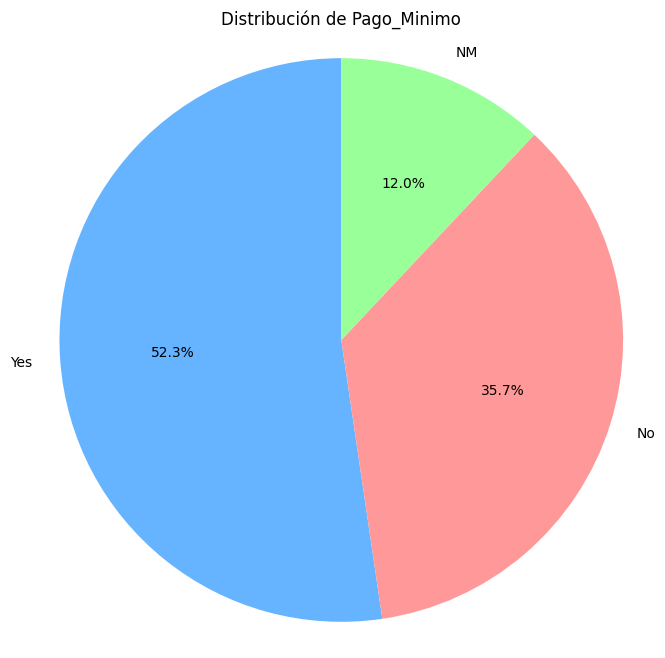

In [53]:
# Contar los valores de la columna Pago_Minimo
conteo_pago_minimo = df['Pago_Minimo'].value_counts()

# Crear la gráfica de torta
plt.figure(figsize=(8, 8))
plt.pie(conteo_pago_minimo, labels=conteo_pago_minimo.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Distribución de Pago_Minimo')
plt.axis('equal')  # Para que sea un círculo perfecto
plt.show()

Al analizar la columna **`Pago_Minimo`** en mi dataset, noté que registra si un cliente pagó solo el monto mínimo ("Yes"), más que eso ("No"), o tiene un valor "NM" que no logré definir con certeza. Tras explorar los datos, vi que "NM" aparece tanto en clientes con préstamos como sin ellos, sugiriendo que podría significar "Not Measured" o "Not Meaningful", pero no necesariamente ausencia de productos financieros. Al graficar su distribución en una torta, obtuve que "Yes" representa un 52.3%, "No" un 35.7% y "NM" un 12%. Aunque "NM" es minoritario y ambiguo, "Yes" y "No" cubren el 88% de los casos y aportan información clave sobre hábitos de pago, lo cual será valioso para entrenar mi modelo. Por eso, decidí mantener la columna y, al realizar la ingeniería de características, planeo aplicar **OneHotEncoder** para transformar estas categorías nominales en columnas binarias, asegurando que el modelo interprete correctamente su impacto sin desechar datos relevantes.

- **Columna "Comportamiento_Pago"**

In [54]:
# Obtener los valores únicos de la columna 'Comportamiento_Pago'
valores_unicos = df['Comportamiento_Pago'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Comportamiento_Pago':")
print(valores_unicos)

Valores únicos en la columna 'Comportamiento_Pago':
['High_spent_Small_value_payments' 'Low_spent_Large_value_payments'
 'Low_spent_Medium_value_payments' 'Low_spent_Small_value_payments'
 'High_spent_Medium_value_payments' 'High_spent_Large_value_payments']


In [55]:
# Crear un diccionario de traducción
traduccion_comportamiento = {
    'High_spent_Small_value_payments': 'Alto gasto con pagos de pequeño valor',
    'Low_spent_Large_value_payments': 'Bajo gasto con pagos de gran valor',
    'Low_spent_Medium_value_payments': 'Bajo gasto con pagos de valor medio',
    'Low_spent_Small_value_payments': 'Bajo gasto con pagos de pequeño valor',
    'High_spent_Medium_value_payments': 'Alto gasto con pagos de valor medio',
    'High_spent_Large_value_payments': 'Alto gasto con pagos de gran valor'
}

# Aplicar la traducción a la columna 'Comportamiento_Pago'
df['Comportamiento_de_Pago'] = df['Comportamiento_Pago'].map(traduccion_comportamiento)

# Eliminar la columna original 'Comportamiento_Pago'
df.drop(columns=['Comportamiento_Pago'], inplace=True)

# Mostrar las primeras filas del DataFrame modificado
df.head()

,ID,ID_Cliente,Mes,Nombre,Edad,Numero_Seguro_Social,Ocupacion,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Tipo_Prestamo,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Mezcla_Crediticia,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Pago_Minimo,Total_Cuota_Mensual,Inversion_Mensual,Saldo_Mensual,Puntaje_Credito,Comportamiento_de_Pago
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,312.494089,Good,Alto gasto con pagos de pequeño valor
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,284.629162,Good,Bajo gasto con pagos de gran valor
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,331.209863,Good,Bajo gasto con pagos de valor medio
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",5.0,4.0,6.27,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.46538,223.451310,Good,Bajo gasto con pagos de pequeño valor
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan",6.0,4.0,11.27,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.46538,341.489231,Good,Alto gasto con pagos de valor medio


In [56]:
# Obtener los valores únicos de la columna 'Comportamiento_Pago'
valores_unicos = df['Comportamiento_de_Pago'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Comportamiento_Pago':")
print(valores_unicos)

Valores únicos en la columna 'Comportamiento_Pago':
['Alto gasto con pagos de pequeño valor'
 'Bajo gasto con pagos de gran valor'
 'Bajo gasto con pagos de valor medio'
 'Bajo gasto con pagos de pequeño valor'
 'Alto gasto con pagos de valor medio'
 'Alto gasto con pagos de gran valor']


### Mi Análisis de la Columna "Comportamiento_Pago"

Al revisar la columna **"Comportamiento_Pago"** en mi dataset, vi que describe cómo los clientes gastan y pagan sus cuentas. Tiene seis valores únicos que combinan el nivel de gasto (alto o bajo) con el tamaño de los pagos (pequeño, mediano o grande). Estos valores son clave para entender sus hábitos financieros, y quiero explicarlos uno por uno antes de contar cómo los usaré en mi modelo.

#### ¿Qué significan los valores únicos?
1. **"Alto gasto con pagos de pequeño valor"**:  
   Gente que gasta mucho pero paga poco. Esto me hace pensar que podrían tener problemas para manejar sus deudas, lo que suena arriesgado.

2. **"Bajo gasto con pagos de gran valor"**:  
   Aquí los clientes gastan poco pero pagan cantidades grandes. Me parece que son responsables, con buena capacidad para ahorrar o pagar de más.

3. **"Bajo gasto con pagos de valor medio"**:  
   Gastan poco y pagan cantidades razonables. Los veo como equilibrados, ni muy arriesgados ni súper destacados.

4. **"Bajo gasto con pagos de pequeño valor"**:  
   Gastan poco y pagan poco. No parecen un riesgo, pero tampoco son muy activos financieramente.

5. **"Alto gasto con pagos de valor medio"**:  
   Gastan mucho y pagan cantidades decentes. Creo que manejan bien su dinero, aunque podrían tener algo de deuda.

6. **"Alto gasto con pagos de gran valor"**:  
   Gastan mucho y pagan mucho. Para mí, son ideales: tienen plata y son responsables.

#### ¿Por qué importa esto?
Estos valores me ayudan a separar a los clientes en grupos: los que podrían ser un problema (como los de alto gasto y pagos pequeños), los súper confiables (bajo gasto y pagos grandes o alto gasto con pagos grandes), y los que están en el medio. Saber esto es útil para predecir cosas como su puntaje crediticio.

#### ¿Qué haré con esta columna?
Cuando llegue el momento de preparar los datos para mi modelo (lo que llamamos ingeniería de características), voy a usar **OneHotEncoder**. ¿Por qué? Porque estas categorías no tienen un orden lógico (ninguna es "mejor" o "peor" que otra en términos numéricos), y quiero que mi modelo las entienda por separado. OneHotEncoder las convertirá en columnas de 0s y 1s, una para cada categoría, así el modelo podrá ver cómo cada comportamiento afecta el resultado sin confundirse. Esto me asegura que la información sea clara y útil para las predicciones.

- **Columna "Puntaje_Credito"**

En este análisis, mi foco está en la columna **`Puntaje_Credito`**, que es la variable objetivo que quiero predecir con mi modelo. Esta columna tiene solo tres valores únicos: **"Good"**, **"Standard"** y **"Poor"**. Cada uno representa cómo de sólido es el perfil crediticio de un cliente. "Good" significa que tienen un historial financiero fuerte, "Standard" que están en un nivel intermedio, y "Poor" que podrían tener problemas para cumplir con sus obligaciones. Mi objetivo es usar otras columnas del dataset, como hábitos de pago o cantidad de préstamos, para entender qué lleva a alguien a caer en una de estas categorías. Así, podré construir un modelo que prediga con precisión si un cliente tendrá un puntaje "Good", "Standard" o "Poor", y eso me ayudará a tomar decisiones basadas en datos.

In [57]:
# Obtener los valores únicos en la columna 'Puntaje_Credito'
valores_unicos = df['Puntaje_Credito'].unique()

# Mostrar los valores únicos
print("Valores únicos en la columna 'Puntaje_Credito':")
print(valores_unicos)

# Contar cuántos valores únicos hay
num_valores_unicos = len(valores_unicos)
print(f"\nNúmero de valores únicos: {num_valores_unicos}")

Valores únicos en la columna 'Puntaje_Credito':
['Good' 'Standard' 'Poor']

Número de valores únicos: 3


Frecuencia de categorías en la columna 'Puntaje_Credito':
Puntaje_Credito
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64


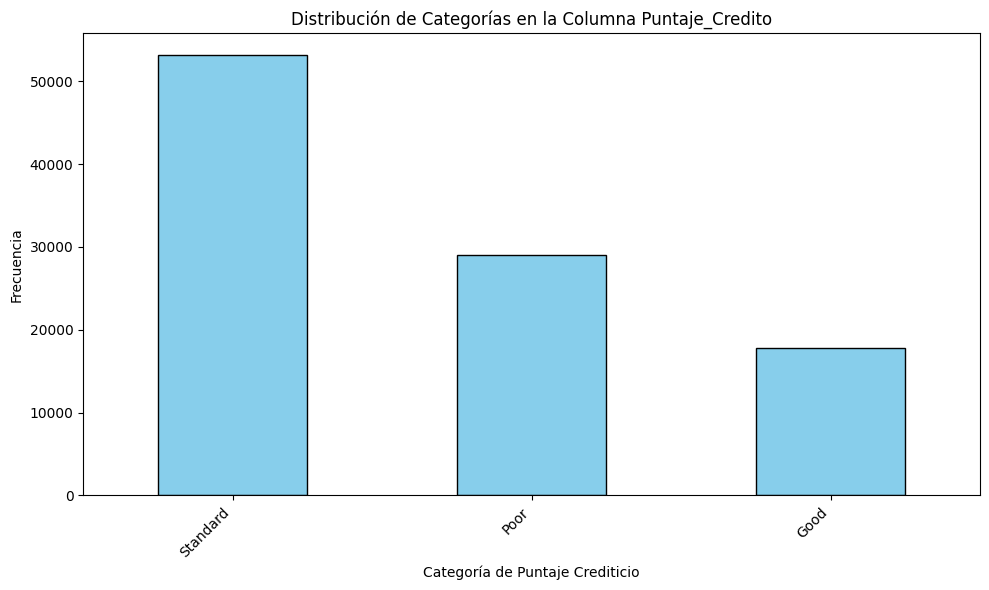

In [58]:
# Contar la frecuencia de cada categoría en la columna 'Puntaje_Credito'
frecuencia_categorias = df['Puntaje_Credito'].value_counts()

# Mostrar las frecuencias
print("Frecuencia de categorías en la columna 'Puntaje_Credito':")
print(frecuencia_categorias)

# Visualizar la distribución con un gráfico de barras
plt.figure(figsize=(10, 6))
frecuencia_categorias.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de Categorías en la Columna Puntaje_Credito')
plt.xlabel('Categoría de Puntaje Crediticio')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [59]:
# 1. Análisis de medias agrupadas por Puntaje_Credito
variables_clave = [
    'Salario_Mensual', 'Num_Prestamos', 'Deuda_Pendiente', 'Tasa_Interes'
]  # Solo incluimos columnas que existen en el DataFrame

analisis_puntaje = df.groupby('Puntaje_Credito')[variables_clave].mean()

# Ordenar por Salario_Mensual de mayor a menor
analisis_puntaje = analisis_puntaje.sort_values(by='Salario_Mensual', ascending=False)

print("Análisis de medias agrupadas por Puntaje_Credito (ordenado por Salario_Mensual):")
analisis_puntaje

Análisis de medias agrupadas por Puntaje_Credito (ordenado por Salario_Mensual):


,Salario_Mensual,Num_Prestamos,Deuda_Pendiente,Tasa_Interes
Puntaje_Credito,,,,
Good,5399.919696,2.202154,801.256324,7.662329
Standard,4239.436890,3.312164,1278.419552,13.751420
Poor,3380.560657,4.755742,2081.473157,20.187116


C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_9632\359195235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_9632\359195235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis\AppData\Local\Temp\ipykernel_9632\359195235.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
C:\Users\Jorge Luis\AppDa

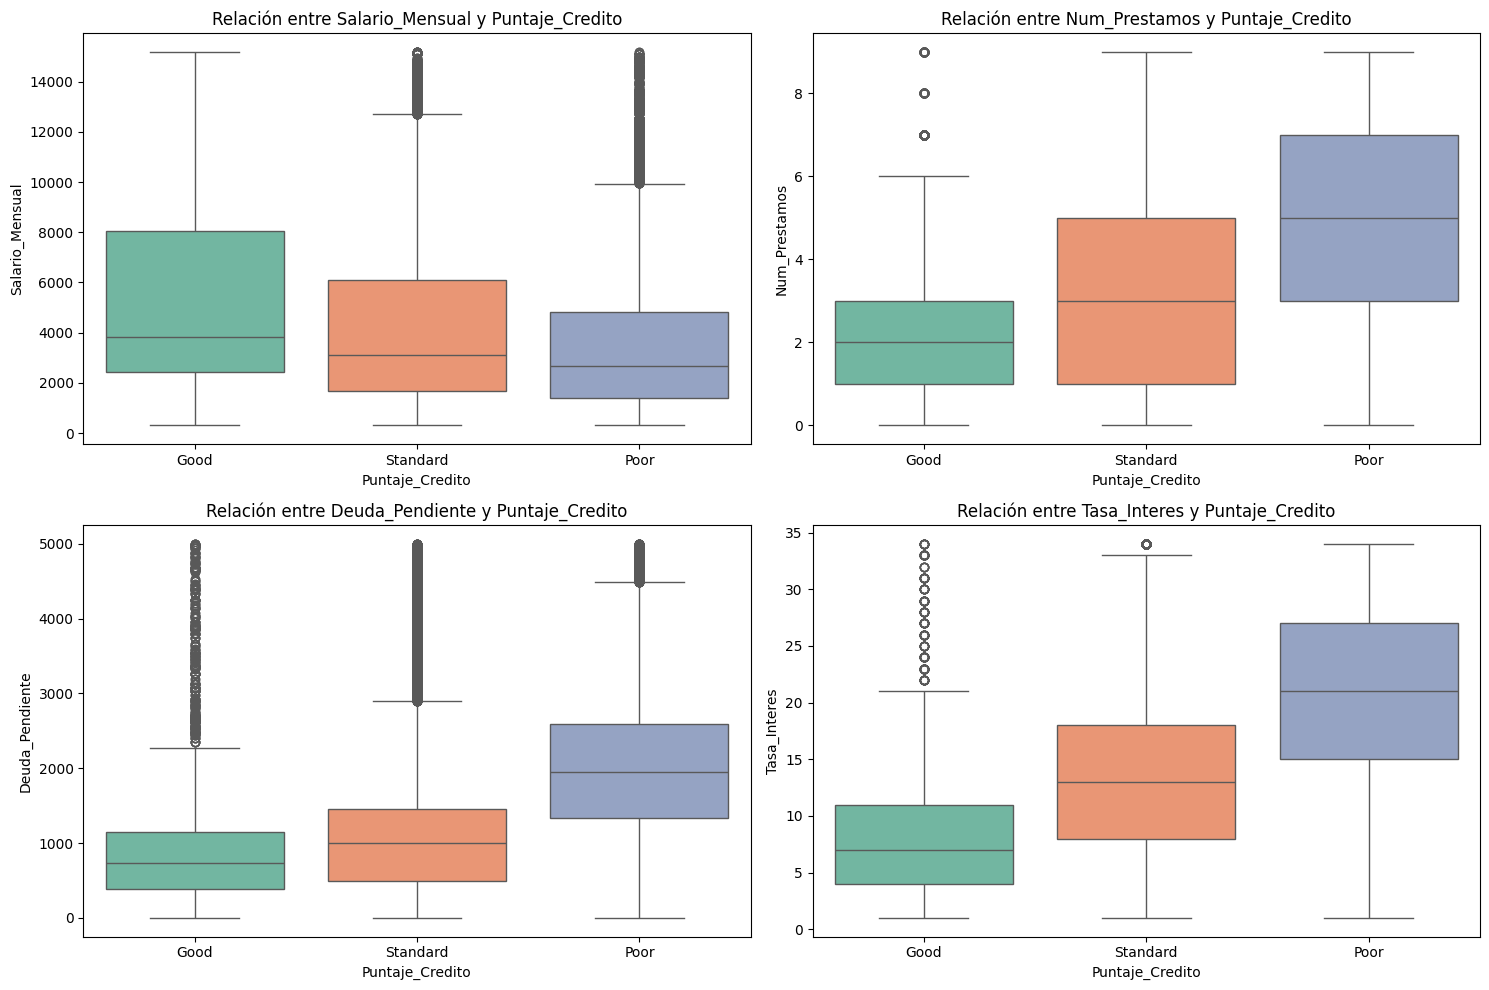

In [60]:
# Visualización de relaciones con gráficos de caja (boxplots)
plt.figure(figsize=(15, 10))

for i, variable in enumerate(variables_clave, 1):
    plt.subplot(2, 2, i)  # Organiza los gráficos en una cuadrícula
    sns.boxplot(data=df, x='Puntaje_Credito', y=variable, palette='Set2')
    plt.title(f'Relación entre {variable} y Puntaje_Credito')
    plt.xlabel('Puntaje_Credito')
    plt.ylabel(variable)
    plt.tight_layout()

#### Conclusión sobre la columna Puntaje_Credito

Al analizar la columna **`Puntaje_Credito`**, vi que "Standard" es la categoría más común, con 53,174 casos, seguida de "Poor" con 28,998 y "Good" con 17,828. Esto me dice que la mayoría de los clientes tienen un perfil crediticio intermedio, aunque hay un grupo considerable en riesgo ("Poor"). Al cruzar estos puntajes con otras variables, como **`Salario_Mensual`**, **`Num_Prestamos`**, **`Deuda_Pendiente`** y **`Tasa_Interes`**, encontré patrones claros: los clientes "Good" tienen el mayor salario mensual (5,399.92 en promedio) y menos préstamos (2.2), con una deuda pendiente baja (801.26) y tasas de interés más favorables (7.66%). En cambio, los "Poor" ganan menos (3,380.56), tienen más préstamos (4.76), una deuda mucho mayor (2,081.47) y enfrentan tasas altas (20.19%). Los "Standard" están en el medio en todos los aspectos. Esto me confirma que un buen puntaje crediticio está ligado a ingresos altos, menos deudas y mejores condiciones de crédito, mientras que un puntaje bajo refleja lo contrario. Estos insights serán clave para entrenar mi modelo y predecir con precisión el **`Puntaje_Credito`** de los clientes.

#### **3.2 Análisis de las Columnas Numericas**

In [61]:
df.describe()

,ID,ID_Cliente,Mes,Edad,Numero_Seguro_Social,Ingreso_Anual,Salario_Mensual,Num_Cuentas_Bancarias,Num_Tarjetas_Credito,Tasa_Interes,Num_Prestamos,Retraso_Pago,Num_Pagos_Retrasados,Cambio_Limite_Credito,Num_Consultas_Credito,Deuda_Pendiente,Ratio_Utilizacion_Credito,Edad_Historial_Credito,Total_Cuota_Mensual,Inversion_Mensual,Saldo_Mensual
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


### Análisis de las Columnas

Revisé las estadísticas de las columnas numéricas que me interesan y esto es lo que encontré:

- **`Edad`**: Los clientes tienen entre 14 y 56 años, con una edad promedio de 33.3. La mitad está entre 24 y 42 años, lo que muestra una población joven-adulta en su mayoría.
- **`Salario_Mensual`**: Los salarios van de 303.65 a 15,204.63, con un promedio de 4,197.27. Hay bastante variedad (desviación de 3,186.43), y el 50% gana entre 1,626.59 y 5,957.71, sugiriendo que muchos tienen ingresos moderados.
- **`Num_Cuentas_Bancarias`**: Van de 0 a 11, con un promedio de 5.37. La mayoría tiene entre 3 y 7 cuentas, lo que indica actividad bancaria variada.
- **`Num_Tarjetas_Credito`**: Entre 0 y 11, promedio de 5.53. El 50% tiene de 4 a 7 tarjetas, mostrando que el uso de crédito es común.
- **`Tasa_Interes`**: Oscila entre 1% y 34%, con un promedio de 14.53%. La mitad está entre 7% y 20%, lo que refleja tasas bastante altas para muchos.
- **`Num_Prestamos`**: Van de 0 a 9, con un promedio de 3.53. El 50% tiene entre 2 y 5 préstamos, sugiriendo que la mayoría tiene alguna deuda activa.
- **`Retraso_Pago`**: Los retrasos van de 0 a 62 días, con un promedio de 21.08. La mitad está entre 10 y 28 días, lo que indica que los retrasos son frecuentes.
- **`Num_Pagos_Retrasados`**: Entre 0 y 25, promedio de 13.31. El 50% tiene de 9 a 18 pagos atrasados, mostrando un historial de incumplimiento notable.
- **`Cambio_Limite_Credito`**: Va de 0.5 a 29.98, con un promedio de 10.47. La mitad está entre 5.38 y 14.85, lo que sugiere ajustes moderados en los límites.
- **`Num_Consultas_Credito`**: De 0 a 17, promedio de 5.8. El 50% tiene entre 3 y 8 consultas, indicando actividad crediticia regular.
- **`Edad_Historial_Credito`**: Entre 1 y 404 meses (unos 33 años), con un promedio de 221.22 (18 años). La mitad tiene entre 144 y 302 meses, mostrando historiales largos en general.

### Observaciones clave:
- Hay una relación interesante entre ingresos, deudas y riesgo: los salarios más bajos podrían explicar los retrasos y la cantidad de préstamos o tarjetas, mientras que tasas de interés altas (hasta 34%) sugieren perfiles de mayor riesgo.
- Los retrasos en pagos (promedio 21 días) y pagos atrasados (promedio 13) son altos, lo que podría afectar negativamente el puntaje crediticio de muchos.
- La edad promedio joven (33 años) y un historial crediticio largo (18 años en promedio) indican que muchos empezaron a usar crédito temprano.

Esto me da una base sólida para entender cómo estas variables podrían influir en mi variable objetivo, **`Puntaje_Credito`**. Por ejemplo, clientes con más retrasos, préstamos y tasas altas probablemente tiendan a "Poor", mientras que los de mayor salario y menos deudas podrían ser "Good".

- **Columna "Numero_Seguro_Social"**

In [62]:
# Cantidad de valores únicos en la columna Customer_ID
unique_customers = df['Numero_Seguro_Social'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 12500


Dado que la columna "Numero_Seguro_Social" tiene 12,500 valores únicos, podemos inferir que la entidad bancaria cuenta con 12,500 clientes. Sin embargo, muchos de estos clientes poseen múltiples registros y/o datos bancarios, lo que indica que un mismo cliente aparece varias veces en el conjunto de datos. Es importante notar que, aunque el dataset contiene 100,000 registros, estos corresponden a solo 12,500 clientes.

- 3.2 **Columna "ID_Cliente"**

In [63]:
# Cantidad de valores únicos en la columna Customer_ID
unique_customers = df['ID_Cliente'].nunique()
print(f"Cantidad de clientes únicos: {unique_customers}")

Cantidad de clientes únicos: 12500


Sí, con este código puedo verificar la cantidad de clientes únicos en el dataset. Si el banco asigna un **ID_Cliente** único a cada cliente, entonces confirma que efectivamente hay **12,500 clientes** en el dataset, aunque cada uno pueda tener múltiples registros asociados.

#### **4. Correlacion entre Columnas**

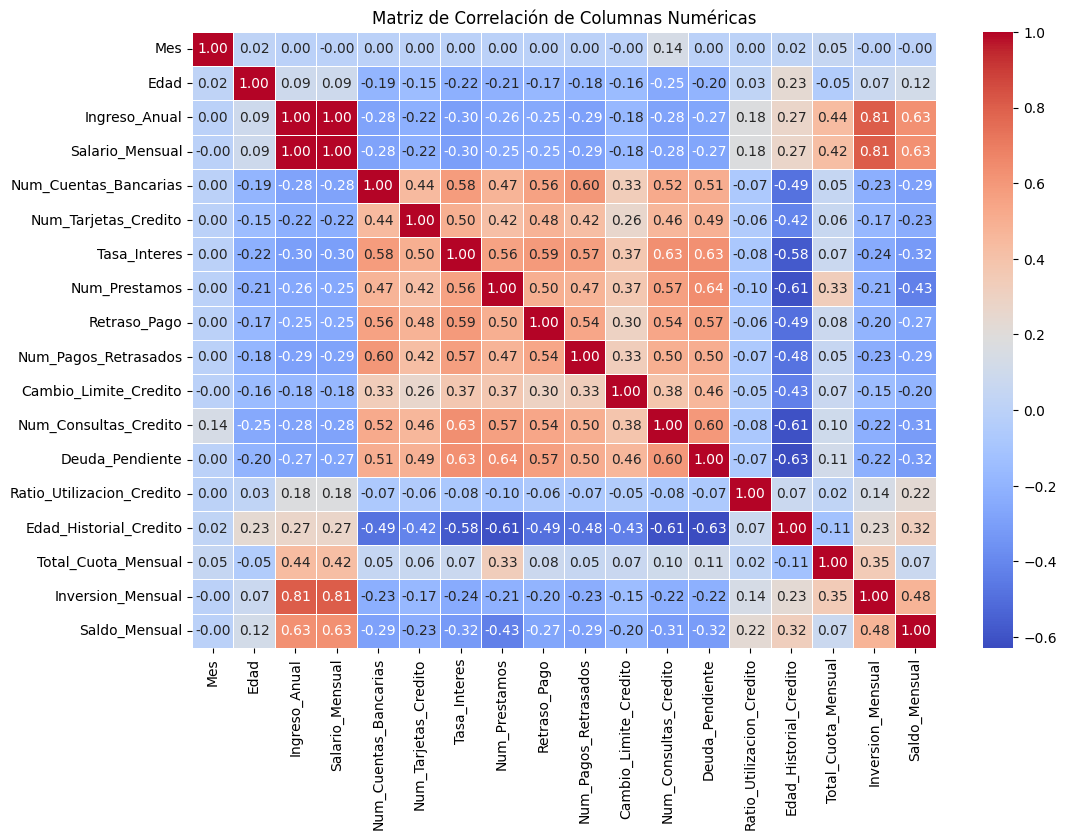

In [64]:
# Seleccionar solo las columnas numéricas
columnas_numericas = [
    'Mes', 'Edad', 'Ingreso_Anual', 'Salario_Mensual', 'Num_Cuentas_Bancarias',
    'Num_Tarjetas_Credito', 'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago',
    'Num_Pagos_Retrasados', 'Cambio_Limite_Credito', 'Num_Consultas_Credito',
    'Deuda_Pendiente', 'Ratio_Utilizacion_Credito', 'Edad_Historial_Credito',
    'Total_Cuota_Mensual', 'Inversion_Mensual', 'Saldo_Mensual'
]

# Crear un subconjunto del DataFrame con esas columnas
df_numeric = df[columnas_numericas]

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Columnas Numéricas')
plt.show()

In [65]:
# # Crear un subconjunto del DataFrame con esas columnas
# df_numeric = df[columnas_numericas]

# # Calcular la matriz de correlación y redondear a 2 decimales
# corr_matrix = df_numeric.corr().round(2)

# # Imprimir la tabla de correlaciones
# print("Tabla de Correlaciones:")
# corr_matrix

### Mi Análisis de las Correlaciones

Al revisar la tabla de correlaciones de mi dataset, me di cuenta de varias cosas interesantes sobre cómo se relacionan las columnas numéricas que estoy estudiando. Esto me ayuda a entender mejor qué variables podrían influir en mi variable objetivo, **`Puntaje_Credito`**, aunque no esté en esta tabla directamente.

Primero, noté que **`Ingreso_Anual`** y **`Salario_Mensual`** tienen una correlación perfecta (1.00), lo que tiene sentido porque uno deriva del otro. También vi que estas dos están muy relacionadas con **`Inversion_Mensual`** (0.81) y **`Saldo_Mensual`** (0.63), lo que me dice que los clientes con más ingresos tienden a invertir más y mantener saldos más altos. Esto podría ser una señal de estabilidad financiera.

Luego, me llamó la atención que **`Tasa_Interes`**, **`Num_Prestamos`**, **`Deuda_Pendiente`**, y **`Num_Consultas_Credito`** tienen correlaciones positivas fuertes entre sí (por ejemplo, 0.63 entre **`Tasa_Interes`** y **`Deuda_Pendiente`**, o 0.64 entre **`Num_Prestamos`** y **`Deuda_Pendiente`**). Esto sugiere que los clientes con más préstamos suelen tener deudas más grandes, tasas de interés más altas y más consultas crediticias, lo que suena como un perfil de riesgo. Además, estas variables se correlacionan negativamente con **`Edad_Historial_Credito`** (por ejemplo, -0.61 con **`Num_Consultas_Credito`**), lo que me hace pensar que los que tienen historiales crediticios más cortos tienden a endeudarse más y a peor costo.

Otro punto interesante es **`Edad`**. Tiene correlaciones negativas moderadas con cosas como **`Tasa_Interes`** (-0.22), **`Num_Prestamos`** (-0.21), y **`Deuda_Pendiente`** (-0.20), pero una positiva con **`Edad_Historial_Credito`** (0.23). Esto me indica que los clientes mayores suelen tener menos deudas y tasas más bajas, quizás porque han construido un historial sólido con el tiempo.

También vi que **`Num_Cuentas_Bancarias`** y **`Num_Tarjetas_Credito`** están relacionadas entre sí (0.44) y con variables de riesgo como **`Tasa_Interes`** (0.58 y 0.50) o **`Retraso_Pago`** (0.56 y 0.48). Esto podría significar que tener muchas cuentas o tarjetas no siempre es bueno, especialmente si viene con retrasos y tasas altas.

Por otro lado, **`Ratio_Utilizacion_Credito`** no parece tener correlaciones fuertes con casi nada (máximo 0.22 con **`Saldo_Mensual`**), lo que me sorprendió, porque esperaba que influyera más en las deudas o tasas. Quizás no sea tan clave como pensaba.

Finalmente, **`Total_Cuota_Mensual`** tiene una correlación moderada con **`Num_Prestamos`** (0.33) e **`Inversion_Mensual`** (0.35), lo que me dice que los que tienen más préstamos también enfrentan cuotas más altas, aunque no siempre afecta mucho su saldo o deudas.

En resumen, veo que las variables de deuda, tasas y retrasos están muy conectadas entre sí y podrían señalar problemas financieros, mientras que ingresos altos y un historial largo parecen ir con estabilidad. Esto me da pistas sobre qué columnas priorizar cuando construya mi modelo para predecir **`Puntaje_Credito`**.

### Mi enfoque
Quiero un modelo limpio, eficiente y que capture lo esencial para predecir **`Puntaje_Credito`**. Para eso, analizaría las correlaciones, pero también probaría la importancia real de las variables con un modelo inicial (como un árbol de decisión o un Random Forest) antes de eliminar cosas solo por correlaciones bajas. Dicho eso, con lo que tenemos ahora, aquí está cómo lo manejaría:

#### Columnas que eliminaría seguro:
1. **`Mes`**: Correlaciones cercanas a cero (máximo 0.14 con **`Num_Consultas_Credito`**). No veo cómo el mes del año afecta el puntaje crediticio, así que fuera.
2. **`Ingreso_Anual`**: Es casi idéntica a **`Salario_Mensual`** (1.00). Prefiero **`Salario_Mensual`** porque refleja capacidad de pago inmediata, que es más relevante para el crédito.
3. **`Ratio_Utilizacion_Credito`**: Correlaciones muy débiles (máximo 0.22 con **`Saldo_Mensual`**). Esperaba más impacto, pero parece no influir mucho, así que la quitaría por ahora.

#### Columnas que evaluaría antes de eliminar:
4. **`Total_Cuota_Mensual`**: Tiene una correlación moderada con **`Num_Prestamos`** (0.33) e **`Ingreso_Anual`** (0.44). Podría ser útil para medir presión financiera (cuotas vs. ingresos), pero si **`Num_Prestamos`** y **`Deuda_Pendiente`** ya cubren esa idea, quizás no la necesite. La probaría en un modelo inicial.
5. **`Inversion_Mensual`**: Correlación alta con **`Salario_Mensual`** (0.81) y moderada con **`Saldo_Mensual`** (0.48). Me gusta porque podría indicar estabilidad o hábitos financieros positivos, algo que **`Puntaje_Credito`** podría valorar. No la eliminaría sin probar su importancia.
6. **`Saldo_Mensual`**: Correlación decente con **`Salario_Mensual`** (0.63) y **`Inversion_Mensual`** (0.48). Podría ser un buen indicador de liquidez, pero si está muy ligada a ingresos, podría ser redundante. También la probaría primero.

#### Columnas que mantendría:
- **`Edad`**, **`Salario_Mensual`**, **`Num_Cuentas_Bancarias`**, **`Num_Tarjetas_Credito`**, **`Tasa_Interes`**, **`Num_Prestamos`**, **`Retraso_Pago`**, **`Num_Pagos_Retrasados`**, **`Cambio_Limite_Credito`**, **`Num_Consultas_Credito`**, **`Deuda_Pendiente`**, **`Edad_Historial_Credito`**: Todas tienen correlaciones moderadas a fuertes entre sí (ej. 0.63 entre **`Tasa_Interes`** y **`Deuda_Pendiente`**) y parecen directamente relacionadas con el riesgo o la salud crediticia, que es lo que quiero predecir.

### Análisis de Importancias para Puntaje_Credito

In [66]:
# Codificar la variable objetivo
le = LabelEncoder()
y = le.fit_transform(df['Puntaje_Credito'])

# Seleccionar columnas numéricas
X = df[['Edad', 'Salario_Mensual', 'Num_Cuentas_Bancarias', 'Num_Tarjetas_Credito',
        'Tasa_Interes', 'Num_Prestamos', 'Retraso_Pago', 'Num_Pagos_Retrasados',
        'Cambio_Limite_Credito', 'Num_Consultas_Credito', 'Deuda_Pendiente',
        'Edad_Historial_Credito', 'Total_Cuota_Mensual', 'Inversion_Mensual', 'Saldo_Mensual']]

# Entrenar modelo
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Crear DataFrame con importancias
importances = pd.DataFrame({'Variable': X.columns, 'Importancia': rf.feature_importances_})
print(importances.sort_values('Importancia', ascending=False))

                  Variable  Importancia
11  Edad_Historial_Credito     0.120304
10         Deuda_Pendiente     0.115777
4             Tasa_Interes     0.095615
14           Saldo_Mensual     0.090218
6             Retraso_Pago     0.078162
8    Cambio_Limite_Credito     0.073088
7     Num_Pagos_Retrasados     0.061250
3     Num_Tarjetas_Credito     0.052834
9    Num_Consultas_Credito     0.051203
1          Salario_Mensual     0.049294
12     Total_Cuota_Mensual     0.048889
0                     Edad     0.048366
13       Inversion_Mensual     0.047364
2    Num_Cuentas_Bancarias     0.040094
5            Num_Prestamos     0.027544


Primero, usé un código con Random Forest para calcular qué tan importante es cada columna numérica al predecir **`Puntaje_Credito`**. Este método entrena un modelo y mide cuánto aporta cada variable a las predicciones, dándome un valor de "importancia" entre 0 y 1. Es una forma práctica de ver qué columnas pesan más y cuáles puedo descartar.

Al revisar los resultados, me sorprendí un poco. **`Edad_Historial_Credito`** (0.12) y **`Deuda_Pendiente`** (0.116) lideran, lo que tiene sentido: un historial largo y la deuda acumulada son claves para el puntaje crediticio. **`Tasa_Interes`** (0.096) y **`Saldo_Mensual`** (0.09) también destacan, probablemente por reflejar el costo del crédito y la liquidez. **`Retraso_Pago`** (0.078) y **`Num_Pagos_Retrasados`** (0.061) confirman que los retrasos influyen, como esperaba.

Me llamó la atención que **`Num_Prestamos`** (0.028) esté tan abajo, pese a correlacionarse con deuda. Parece que **`Deuda_Pendiente`** ya cubre esa información. **`Salario_Mensual`** (0.049), **`Inversion_Mensual`** (0.047), y **`Total_Cuota_Mensual`** (0.049) tienen pesos medios, así que dudaría en eliminarlas. **`Num_Cuentas_Bancarias`** (0.04) y **`Num_Prestamos`** (0.028) aportan poco, así que planeo quitarlas para simplificar sin perder lo esencial.

---

### Decisiones sobre las columnas del dataset

Tras analizar correlaciones e importancias, decidí eliminar las siguientes columnas por su baja relevancia o redundancia:
- **`ID`** y **`Customer_ID`**: Son identificadores únicos que no aportan valor predictivo para **`Puntaje_Credito`**.
- **`Mes`**: Sus correlaciones son casi nulas (máximo 0.14), irrelevante para el objetivo.
- **`Ingreso_Anual`**: Redundante con **`Salario_Mensual`** (correlación 1.00), que es más útil.
- **`Ratio_Utilizacion_Credito`**: Correlaciones muy bajas (máximo 0.22), poco impacto.
- **`Num_Cuentas_Bancarias`**: Importancia baja (0.04), no influye mucho.
- **`Num_Prestamos`**: Importancia muy baja (0.028), cubierta por **`Deuda_Pendiente`**.

Me quedo con estas columnas numéricas porque tienen correlaciones o importancias relevantes:
- **`Edad`**, **`Salario_Mensual`**, **`Num_Tarjetas_Credito`**, **`Tasa_Interes`**, **`Retraso_Pago`**, **`Num_Pagos_Retrasados`**, **`Cambio_Limite_Credito`**, **`Num_Consultas_Credito`**, **`Deuda_Pendiente`**, **`Edad_Historial_Credito`**, **`Total_Cuota_Mensual`**, **`Inversion_Mensual`**, **`Saldo_Mensual`**: Todas mostraron valores decentes (importancias entre 0.047 y 0.12) o relaciones claras con variables clave como deuda y pagos, lo que las hace útiles para predecir **`Puntaje_Credito`**.

Esto simplifica el dataset sin perder información crítica. Si quieres ver cómo sigo con la ingeniería de características, como codificar las variables categóricas con OneHotEncoder y preparar el modelo, te invito a revisar mi próximo notebook. ¡Ahí seguimos afinando los datos!

In [71]:
import os

# Crear la carpeta 'data' si no existe
if not os.path.exists('../data'):
    os.makedirs('data')

# Guardar el DataFrame en un archivo CSV dentro de la carpeta 'data'
df.to_csv('../data/data_Result_EDA.csv', index=False)

print("El archivo 'data_Result_EDA.csv' ha sido guardado exitosamente en la carpeta 'data'.")

El archivo 'data_Result_EDA.csv' ha sido guardado exitosamente en la carpeta 'data'.
